In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from tkinter import font


def monitor_plot(file, num_cores):
    f = open(file, "r")
    lines = f.readlines()
    n = 0
    lst = []
    flag = False
    for line in lines[2:]:
        if line[:4] == "TIME":
            n += 1
        elif line[4:8] == "CORE":
            if flag == True:
                lst.append(data)
            data = []
            flag = True
        else:
            tmp = line.split()[1:]
            tmp[1] = tmp[1][:-1]
            if float(tmp[0]) > 2.8 or float(tmp[0]) < 1.2 or int(tmp[1]) < 10:  # tmp[0]: IPC, ignore large and small IPC cases; tmp[1]: MISSES, ignore tiny cases. When program starts, IPC should be around 2 and MISSES should be at least 5000k
                flag = False
            data.append(tmp)
    # lst=lst[1:-1]

    IPC = [0] * num_cores
    MISSES = [0] * num_cores
    LLC = [0] * num_cores
    MBL = [0] * num_cores
    MBR = [0] * num_cores

    for data in lst:
        for i in range(num_cores):
            IPC[i] += float(data[i][0])
            MISSES[i] += int(data[i][1])
            LLC[i] += float(data[i][2])
            MBL[i] += float(data[i][3])
            MBR[i] += float(data[i][4])

    # print("IPC: {:.2f} MISSES: {:.2f}k LLC: {:.2f} MBL: {:.2f} MBR: {:.2f}".format(sum(IPC)/len(lst)/num_cores, sum(MISSES)//len(lst)/num_cores, sum(LLC)/len(lst)/num_cores, sum(MBL)/len(lst)/num_cores, sum(MBR)/len(lst)/num_cores))

    IPC_lst = []
    MISSES_lst = []
    LLC_lst = []
    MBL_lst = []
    MBR_lst = []
    for i in range(num_cores):
        IPC_lst.append([])
        MISSES_lst.append([])
        LLC_lst.append([])
        MBL_lst.append([])
        MBR_lst.append([])

    for data in lst:
        for i in range(num_cores):
            IPC_lst[i].append(float(data[i][0])) 
            MISSES_lst[i].append(int(data[i][1]))
            LLC_lst[i].append(float(data[i][2]))
            MBL_lst[i].append(float(data[i][3]))
            MBR_lst[i].append(float(data[i][4]))

    LLC_sum = []
    for i in range(len(LLC_lst[0])):
        tmp = 0
        for j in range(num_cores):
            tmp += LLC_lst[j][i]
        LLC_sum.append(tmp/1000)


    plt.figure(figsize=(22, 4))
    plt.subplot(1, 5, 1)
    plt.title("Instruction per Cycle(IPC)", fontsize=14)
    for j in range(num_cores):
        plt.plot([i for i in range(len(IPC_lst[j]))], IPC_lst[j])
    plt.subplot(1, 5, 2)
    plt.title("Million LLC Misses", fontsize=14)
    for j in range(num_cores):
        plt.plot([i for i in range(len(MISSES_lst[j]))], MISSES_lst[j])
    plt.subplot(1, 5, 3)
    plt.title("LLC Occupancy/MB", fontsize=14)
    plt.plot([i for i in range(len(LLC_sum))], LLC_sum)
    plt.subplot(1, 5, 4)
    plt.title("Memory Bandwidth Local (MB/s)", fontsize=14)
    for j in range(num_cores):
        plt.plot([i for i in range(len(MBL_lst[j]))], MBL_lst[j])
    plt.subplot(1, 5, 5)
    plt.title("Memory Bandwidth Remote (MB/s)", fontsize=14)
    for j in range(num_cores):
        plt.plot([i for i in range(len(MBR_lst[j]))], MBR_lst[j])

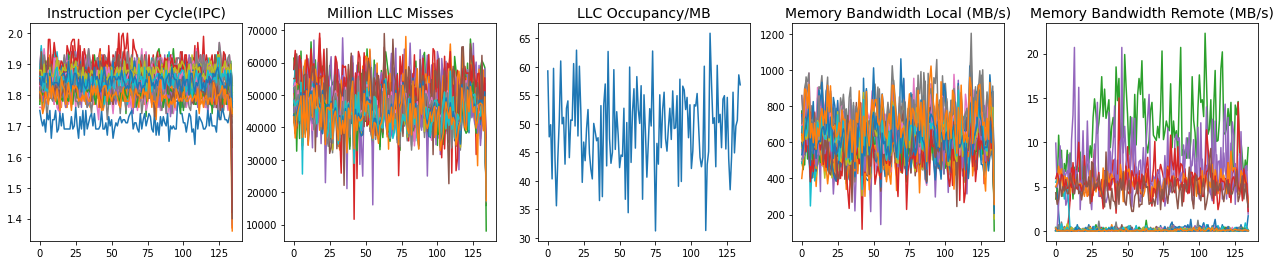

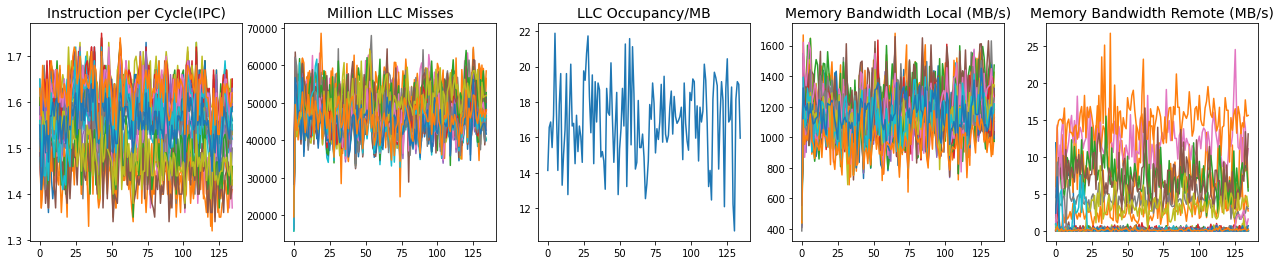

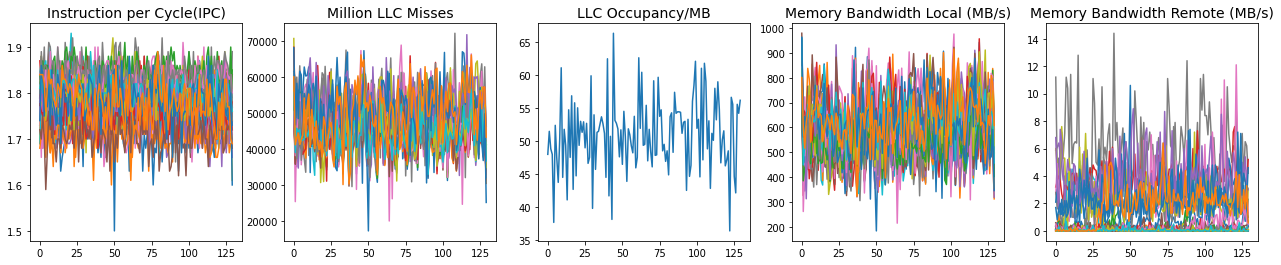

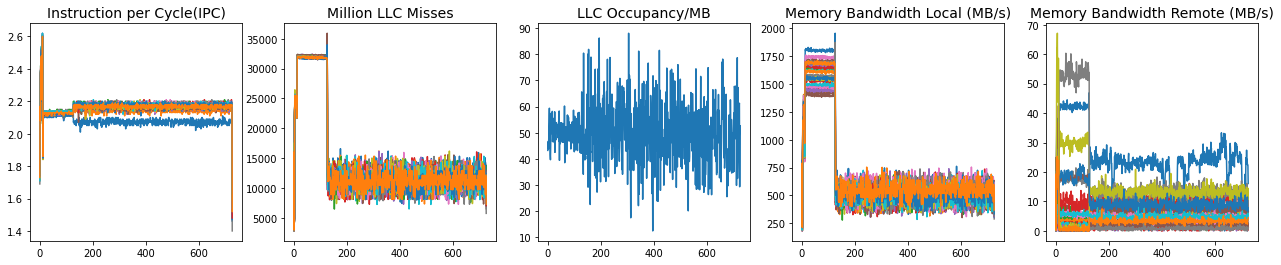

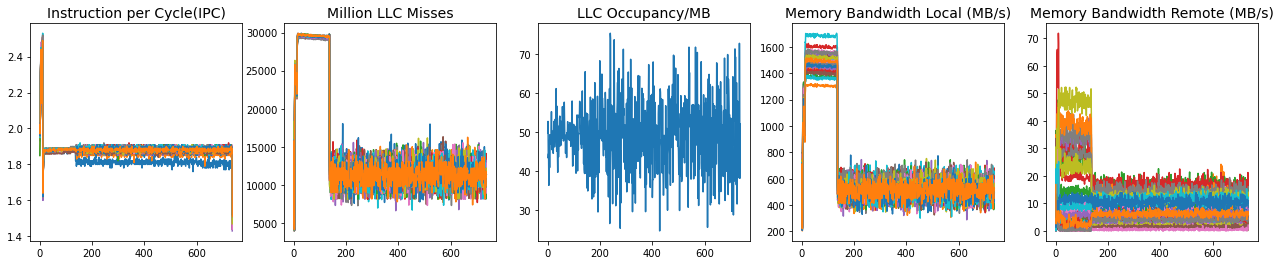

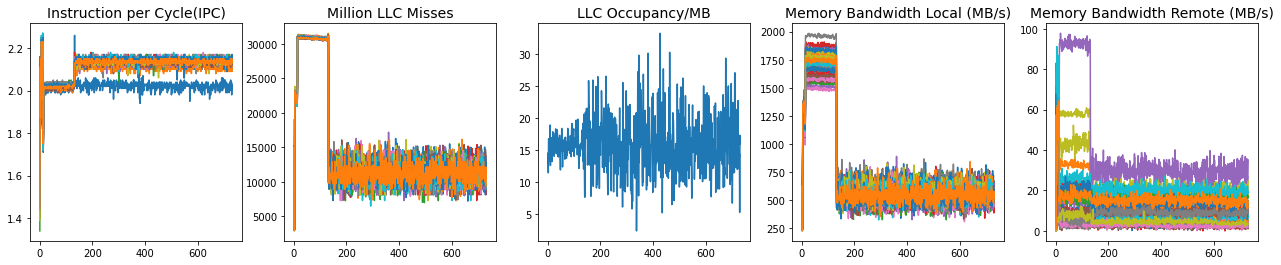

In [37]:
num_cores = 32
monitor_plot("/data2/yufenggu/bert_12llc", num_cores)
monitor_plot("/data2/yufenggu/bert_4llc", num_cores)
monitor_plot("/data2/yufenggu/bert_25mb", num_cores)
monitor_plot("/data2/yufenggu/resnet50_100mb", num_cores)
monitor_plot("/data2/yufenggu/resnet50_25mb", num_cores)
monitor_plot("/data2/yufenggu/resnet50_4llc", num_cores)